In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
titanic = pd.read_csv('./titanic.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Visualizing your data

### Histogram

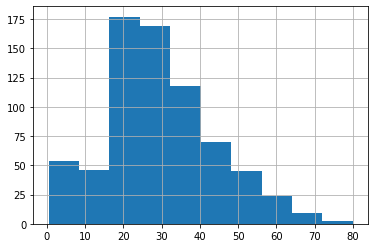

In [7]:
titanic['Age'].hist()
plt.show()

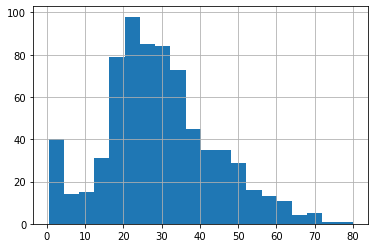

In [8]:
titanic['Age'].hist(bins=20)
plt.show()

<AxesSubplot:>

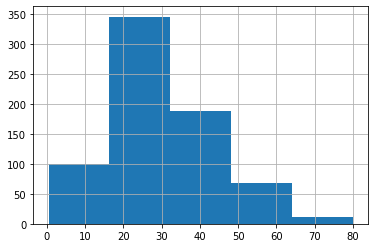

In [9]:
titanic['Age'].hist(bins=5)

### Bar plots

In [12]:
gender_count = titanic.groupby('Sex')['Age'].count()
gender_count

Sex
female    261
male      453
Name: Age, dtype: int64

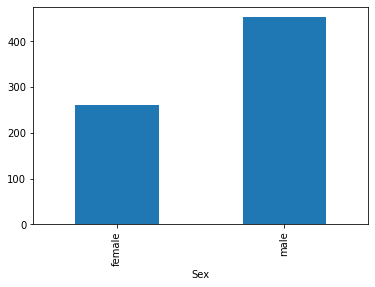

In [14]:
gender_count.plot(kind= 'bar')
plt.show()

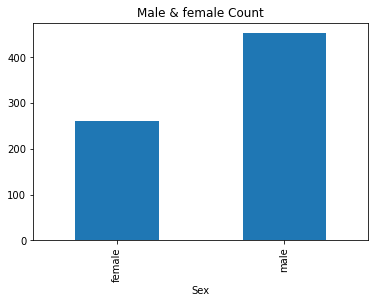

In [15]:
gender_count.plot(kind= 'bar', title= 'Male & female Count')
plt.show()

### Line plots

In [49]:
ten_ages = titanic.Age.iloc[7:15]
ten_ages

7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
Name: Age, dtype: float64

<AxesSubplot:>

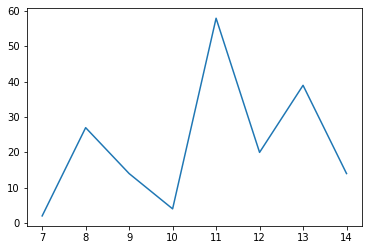

In [50]:
ten_ages.plot(x = ten_ages.index, y= ten_ages.values , kind= 'line') # < -- rotating x_labe

<AxesSubplot:>

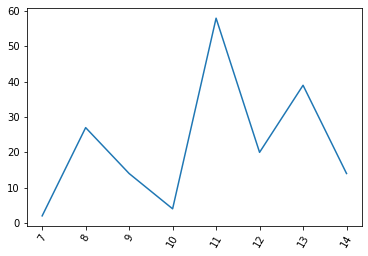

In [52]:
ten_ages.plot(x = ten_ages.index, y= ten_ages.values , kind= 'line', rot= 60)

### Scatter Plots

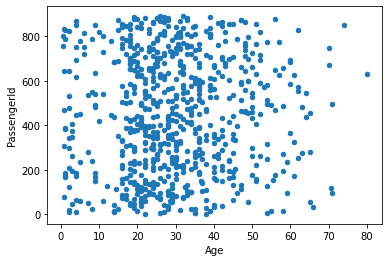

In [61]:
titanic.plot(x = 'Age', y= 'PassengerId' , kind= 'scatter')
plt.show()

### Layering plots

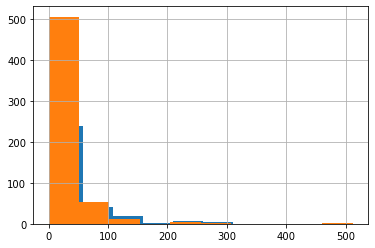

In [74]:
titanic[ titanic['Sex'] ==  "female"]['Fare'].hist() # < -- Blue Female
titanic[ titanic['Sex'] ==  "male"]['Fare'].hist() # <-- orange male
plt.show()

##### Add a legend

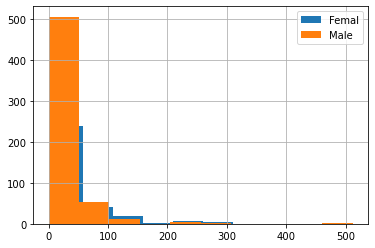

In [75]:
titanic[ titanic['Sex'] ==  "female"]['Fare'].hist()
titanic[ titanic['Sex'] ==  "male"]['Fare'].hist() 
plt.legend(['Femal', 'Male']) #adding legend to make it more clear
plt.show()

#### transparency

<AxesSubplot:>

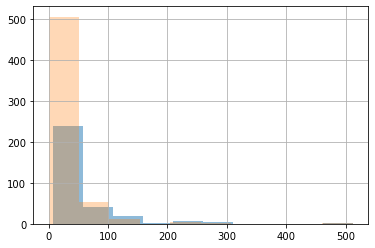

In [90]:
titanic[titanic['Sex'] == 'female']['Fare'].hist(alpha= 0.5) #<-- Blue
titanic[titanic['Sex'] == 'male']['Fare'].hist(alpha= 0.3)#<-- Orange

## Missing Values

In [107]:
titanic.shape

(891, 12)

In [96]:
titanic.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [98]:
titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [99]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### ploting missing values

<AxesSubplot:>

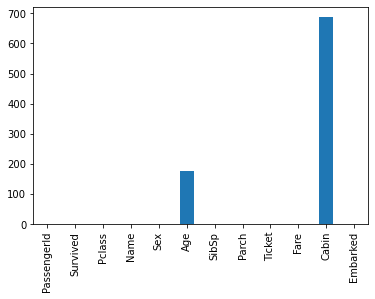

In [100]:
titanic.isna().sum().plot(kind='bar')

#### Removing missing values

In [110]:
titanic.dropna().head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [105]:
titanic.dropna().shape #<--method1

(183, 12)

In [111]:
titanic.fillna(0).shape #<--method2

(891, 12)

## Creating DataFrame

<img src= './media/creating_dataframe.png'>

### list of Dictionaries - by row

In [118]:
list_of_dictionary = [
    {'name':'Ginger',
     'breed': 'lusi',
     'height_cm': 22,
     'weight_kgs':10 ,
     'date_of_birth':"2020-02-14"},
    
    { 'name': 'Scout',
     'breed': 'Dalmatian',
     'height_cm': 59,
     'weight_kgs':35 ,
     'date_of_birth':"2019-05-09"}
]

In [119]:
dogs = pd.DataFrame(list_of_dictionary)

In [120]:
dogs

,name,breed,height_cm,weight_kgs,date_of_birth
0,Ginger,lusi,22,10,2020-02-14
1,Scout,Dalmatian,59,35,2019-05-09


#### Dixtionary pf list -by column

In [121]:
dict_of_list = {
    'name': ['lusi', 'Scout'],
    'breed': ['Desi', 'farmi'],
    'weight_kg': [22,20]
}

In [122]:
dogs1 = pd.DataFrame(dict_of_list)

In [123]:
dogs1

,name,breed,weight_kg
0,lusi,Desi,22
1,Scout,farmi,20


## Reading & writing CSVs

<img src = './media/csv.png'>

#### CSV to DataFrame

In [126]:
dogs = pd.read_csv('./dogs.csv')
dogs

,Name,Breed,Color,Height(cm),Weight(kg),Date of Birth
0,Bella,Labrador,Brown,56,25,2013-07-01
1,Charlie,Poodle,Black,43,23,2016-09-16
2,Lucy,Chow,Brown,46,22,2014-08-25
3,Cooper,Schnauzer,Gray,49,17,2011-12-11
4,Max,Labrador,Black,59,29,2017-01-20
5,Stella,Chihuahua,Tan,18,2,2015-04-20
6,Bernie,St. Bernard,White,77,74,2018-02-2


In [127]:
dogs['new_column'] = True

In [128]:
dogs

,Name,Breed,Color,Height(cm),Weight(kg),Date of Birth,new_column
0,Bella,Labrador,Brown,56,25,2013-07-01,True
1,Charlie,Poodle,Black,43,23,2016-09-16,True
2,Lucy,Chow,Brown,46,22,2014-08-25,True
3,Cooper,Schnauzer,Gray,49,17,2011-12-11,True
4,Max,Labrador,Black,59,29,2017-01-20,True
5,Stella,Chihuahua,Tan,18,2,2015-04-20,True
6,Bernie,St. Bernard,White,77,74,2018-02-2,True


#### DataFrame to CSV

In [129]:
dogs.to_csv('new_dogs.csv')

###### _______________Comgradualtion do projects now____